CVS

CSV 자료 모델 자료 작업

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/')
#!rm -rf dog
#!unzip    tiny10.zip

#!mv tiny10 dog

In [ ]:
#!wget http://shsoft.ipdisk.co.kr:8000/list/HDD1/mybot/tiny10.zip

In [ ]:
# install ultralytic
#!pip3 install git+https://github.com/ultralytics/ultralytics.git
#!pip3 install kaggle opendatasets


In [ ]:
#!pip install ultralytics
#!pip install pydantic

## Download Dataset

Yoga pose image dataset from kaggle  public dataset https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification this use 5 yoga pose

In [ ]:
# Download kaggle dataset
#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification')

In [ ]:
#!ls /content/yoga-pose-classification/YogaPoses

In [ ]:
#!wget http://shsoft.ipdisk.co.kr:8000/list/HDD1/mybot/tiny.zip

## Yolov8 Pose

In [ ]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

In [ ]:
model = ultralytics.YOLO(model='yolov8m-pose.pt')

from ultralytics import YOLO
import cv2
from PIL import Image

model_path = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/last.pt'


model = YOLO(model_path)



In [20]:
#image = cv2.imread('/home/skpark/git/yolov8/YogaPoses/Tree/00000002.jpg')
image = cv2.imread('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog/tiny/tiny/lying/718frame_114_timestamp_3800.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy



0: 640x384 1 quadruped, 5.1ms
Speed: 8.3ms preprocess, 5.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


tensor([[  0.,   1., 336., 892.]], device='cuda:0')

In [21]:
result.keypoints[0]

#result.keypoints[0].length()

ultralytics.yolo.engine.results.Keypoints object with attributes:

conf: tensor([[0.9611, 0.9653, 0.9482, 0.8354, 0.8381, 0.9357, 0.8365, 0.7435, 0.0637, 0.0396, 0.8961, 0.7961, 0.6864, 0.0533, 0.0388, 0.4214, 0.5016, 0.9268, 0.9111, 0.5192, 0.4121, 0.5197, 0.3449, 0.2162, 0.8816, 0.8712, 0.7121, 0.8359, 0.7007, 0.8402, 0.5168, 0.3333, 0.4567, 0.3623, 0.3516, 0.5190, 0.6001, 0.3387, 0.4234]],
       device='cuda:0')
data: tensor([[[3.1251e+02, 3.4566e+02, 9.6106e-01],
         [3.1494e+02, 3.8208e+02, 9.6529e-01],
         [3.1517e+02, 4.0698e+02, 9.4824e-01],
         [2.8268e+02, 4.2170e+02, 8.3540e-01],
         [3.5509e+02, 4.1008e+02, 8.3808e-01],
         [2.6596e+02, 3.3538e+02, 9.3566e-01],
         [2.1550e+02, 3.0835e+02, 8.3650e-01],
         [1.8844e+02, 3.1258e+02, 7.4351e-01],
         [2.6233e+02, 2.6601e+02, 6.3677e-02],
         [2.6510e+02, 2.6701e+02, 3.9570e-02],
         [3.6907e+02, 3.2967e+02, 8.9611e-01],
         [4.1297e+02, 3.1360e+02, 7.9615e-01],
         [

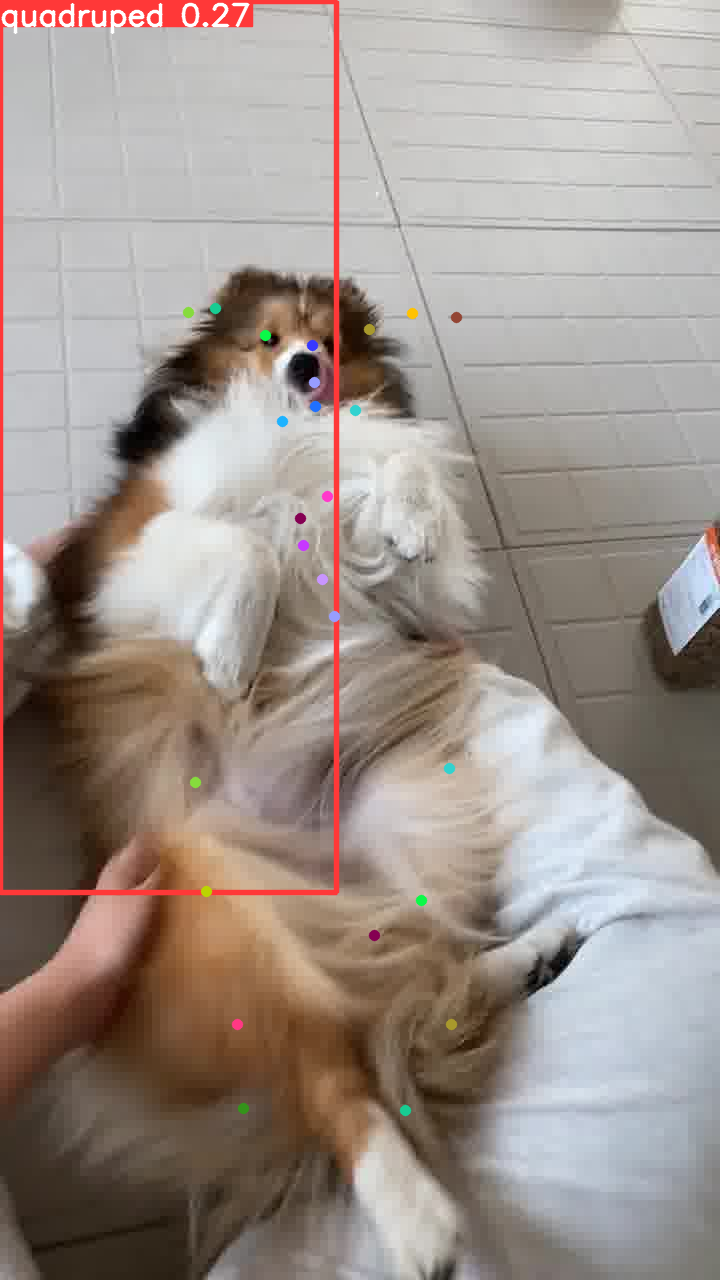

In [22]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

## Generate Dataset

### Keypoint extract

Yolov8 pose estimation memiliki 17 keypoint
* NOSE:           int = 0
* LEFT_EYE:       int = 1
* RIGHT_EYE:      int = 2
* LEFT_EAR:       int = 3
* RIGHT_EAR:      int = 4
* LEFT_SHOULDER:  int = 5
* RIGHT_SHOULDER: int = 6
* LEFT_ELBOW:     int = 7
* RIGHT_ELBOW:    int = 8
* LEFT_WRIST:     int = 9
* RIGHT_WRIST:    int = 10
* LEFT_HIP:       int = 11
* RIGHT_HIP:      int = 12
* LEFT_KNEE:      int = 13
* RIGHT_KNEE:     int = 14
* LEFT_ANKLE:     int = 15
* RIGHT_ANKLE:    int = 16

In [ ]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    UPPER_JAW:           int = 1
    LOWER_JAW:           int = 2
    MOUTH_END_RIGHT:           int = 3
    MOUTH_END_LEFT:           int = 4

    RIGHT_EYE:           int = 5
    RIGHT_EARBASE:           int = 6
    RIGHT_EAREND:           int = 7
    RIGHT_ANTLER_BASE:           int = 8
    RIGHT_ANTLER_END:           int = 9

    LEFT_EYE:           int = 10
    LEFT_EARBASE:           int = 11
    LEFT_EAREND:           int = 12
    LEFT_ANTLER_BASE:           int = 13
    LEFT_ANTLER_END:           int = 14

    NECK_BASE:           int = 15
    NECK_END:           int = 16

    THROAT_BASE:           int = 17
    THROAT_END:           int = 18

    BACK_BASE:           int =19
    BACK_END:           int = 20
    BACK_MIDDLE:           int = 21

    TAIL_BASE:           int = 22
    TAIL_END:           int = 23

    FRONT_LEFT_THAI:           int = 24
    FRONT_LEFT_KNEE:           int = 25
    FRONT_LEFT_PAW:           int = 26
    FRONT_RIGHT_THAI:           int = 27
    FRONT_RIGHT_PAW:           int = 28
    FRONT_RIGHT_KNEE:           int = 29

    BACK_LEFT_KNEE:           int = 30
    BACK_LEFT_PAW:           int = 31
    BACK_LEFT_THAI:           int = 32
    BACK_RIGHT_THAI:           int = 33
    BACK_RIGHT_PAW:           int = 34
    BACK_RIGHT_KNEE:           int = 35

    BELLY_BOTTOM:           int = 36

    BODY_MIDDLE_RIGHT:           int = 37
    BODY_MIDDLE_LEFT:           int = 38

get_keypoint = GetKeypoint()

In [ ]:
import os
import glob

In [ ]:
dataset_root = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog/tiny/tiny/'
pose_list = os.listdir(dataset_root)
pose_list

In [ ]:
def extract_keypoint(keypoint) -> list:
        # nose
        nose_x, nose_y = keypoint[get_keypoint.NOSE] #0
        upper_jaw_x,upper_jaw_y  = keypoint[get_keypoint.UPPER_JAW] #1
        lower_jaw_x,lower_jaw_y  = keypoint[get_keypoint.LOWER_JAW] #2
        mouth_end_right_x,mouth_end_right_y = keypoint[get_keypoint.MOUTH_END_RIGHT] #3
        mouth_end_left_x,mouth_end_left_y = keypoint[get_keypoint.MOUTH_END_LEFT] #4

        right_eye_x,right_eye_y  = keypoint[get_keypoint.RIGHT_EYE] #5
        right_earbase_x,right_earbase_y = keypoint[get_keypoint.RIGHT_EARBASE] #6
        right_earend_x,right_earend_y = keypoint[get_keypoint.RIGHT_EAREND]#7
        right_antler_base_x,right_antler_base_y = keypoint[get_keypoint.RIGHT_ANTLER_BASE] #8
        right_antler_end_x,right_antler_end_y = keypoint[get_keypoint.RIGHT_ANTLER_END] #9

        left_eye_x,left_eye_y= keypoint[get_keypoint.LEFT_EYE] #10
        left_earbase_x,left_earbase_y = keypoint[get_keypoint.LEFT_EARBASE] #11
        left_earend_x,left_earend_y = keypoint[get_keypoint.LEFT_EAREND] #12
        left_antler_base_x,left_antler_base_y = keypoint[get_keypoint.LEFT_ANTLER_BASE] #13
        left_antler_end_x,left_antler_end_y = keypoint[get_keypoint.LEFT_ANTLER_END] #14

        neck_base_x,neck_base_y = keypoint[get_keypoint.NECK_BASE] #15
        neck_end_x,neck_end_y = keypoint[get_keypoint.NECK_END] #16

        throat_base_x,throat_base_y = keypoint[get_keypoint.THROAT_BASE]#17
        throat_end_x,throat_end_y = keypoint[get_keypoint.THROAT_END]#18

        back_base_x,back_base_y = keypoint[get_keypoint.BACK_BASE]#19
        back_end_x,back_end_y = keypoint[get_keypoint.BACK_END]#20
        back_middle_x,back_middle_y = keypoint[get_keypoint.BACK_MIDDLE]#21

        tail_base_x,tail_base_y = keypoint[get_keypoint.TAIL_BASE]#22
        tail_end_x,tail_end_y = keypoint[get_keypoint.TAIL_END]#23

        front_left_thai_x,front_left_thai_y = keypoint[get_keypoint.FRONT_LEFT_THAI]#24
        front_left_knee_x,front_left_knee_y = keypoint[get_keypoint.FRONT_LEFT_KNEE]#25
        front_left_paw_x,front_left_paw_y = keypoint[get_keypoint.FRONT_LEFT_PAW]#26
        front_right_thai_x,front_right_thai_y = keypoint[get_keypoint.FRONT_RIGHT_THAI]#27
        front_right_paw_x,front_right_paw_y = keypoint[get_keypoint.FRONT_RIGHT_PAW]#28
        front_right_knee_x,front_right_knee_y = keypoint[get_keypoint.FRONT_RIGHT_KNEE]#29

        back_left_knee_x,back_left_knee_y = keypoint[get_keypoint.BACK_LEFT_KNEE]#30
        back_left_paw_x,back_left_paw_y = keypoint[get_keypoint.BACK_LEFT_PAW]#31
        back_left_thai_x,back_left_thai_y = keypoint[get_keypoint.BACK_LEFT_THAI]#32
        back_right_thai_x,back_right_thai_y = keypoint[get_keypoint.BACK_RIGHT_THAI]#33
        back_right_paw_x,back_right_paw_y = keypoint[get_keypoint.BACK_RIGHT_PAW]#34
        back_right_knee_x,back_right_knee_y = keypoint[get_keypoint.BACK_RIGHT_KNEE]#35

        belly_bottom_x,belly_bottom_y = keypoint[get_keypoint.BELLY_BOTTOM]#36

        body_middle_right_x,body_middle_right_y = keypoint[get_keypoint.BODY_MIDDLE_RIGHT]#37
        body_middle_left_x,body_middle_left_y = keypoint[get_keypoint.BODY_MIDDLE_LEFT]#38

        return [
        nose_x, nose_y #0
        ,upper_jaw_x,upper_jaw_y  #1
        ,lower_jaw_x,lower_jaw_y  #2
        ,mouth_end_right_x,mouth_end_right_y #3
        ,mouth_end_left_x,mouth_end_left_y #4

        ,right_eye_x,right_eye_y  #5
        ,right_earbase_x,right_earbase_y #6
        ,right_earend_x,right_earend_y #7
        ,right_antler_base_x,right_antler_base_y #8
        ,right_antler_end_x,right_antler_end_y #9

        ,left_eye_x,left_eye_y #10
        ,left_earbase_x,left_earbase_y #11
        ,left_earend_x,left_earend_y #12
        ,left_antler_base_x,left_antler_base_y #13
        ,left_antler_end_x,left_antler_end_y  #14

        ,neck_base_x,neck_base_y #15
        ,neck_end_x,neck_end_y #16
        ,throat_base_x,throat_base_y #17
        ,throat_end_x,throat_end_y #18

        ,back_base_x,back_base_y #19
        ,back_end_x,back_end_y #20
        ,back_middle_x,back_middle_y #21
        ,tail_base_x,tail_base_y #22
        ,tail_end_x,tail_end_y #23
        ,front_left_thai_x,front_left_thai_y #24
        ,front_left_knee_x,front_left_knee_y #25
        ,front_left_paw_x,front_left_paw_y #26
        ,front_right_thai_x,front_right_thai_y #27
        ,front_right_paw_x,front_right_paw_y #28
        ,front_right_knee_x,front_right_knee_y #29
        ,back_left_knee_x,back_left_knee_y #30
        ,back_left_paw_x,back_left_paw_y #31
        ,back_left_thai_x,back_left_thai_y #32
        ,back_right_thai_x,back_right_thai_y #33
        ,back_right_paw_x,back_right_paw_y #34
        ,back_right_knee_x,back_right_knee_y #35
        ,belly_bottom_x,belly_bottom_y #36
        ,body_middle_right_x,body_middle_right_y #37
        ,body_middle_left_x,body_middle_left_y #38
        ]

### Run image

In [ ]:
dataset_csv = []
i = 0
#print(dataset_root)
#print(pose_list)
for pose in pose_list:
    #print(pose)
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        print(i)
        i = i +1
        # get image_name
        image_name = image_path.split('/')[-1]
        #print(image_name)
        # read numpy image
        image = cv2.imread(image_path)

        # get height width image
        height, width = image.shape[:2]
        #print(height,width)
        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        #print(results)
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 39:
                #print("result_keypoint=====>")
                #print( result_keypoint)

                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                #print('image_name==============================>'+image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)
        # break
    # break
#print(dataset_csv)

In [ ]:
import csv
# write csv
header = [
          'image_name','label'
          ,'nose_x','nose_y' #0
          ,'upper_jaw_x','upper_jaw_y'  #1
          ,'lower_jaw_x','lower_jaw_y'  #2
          ,'mouth_end_right_x','mouth_end_right_y' #3
          ,'mouth_end_left_x','mouth_end_left_y' #4

          ,'right_eye_x','right_eye_y'  #5
          ,'right_earbase_x','right_earbase_y' #6
          ,'right_earend_x','right_earend_y' #7
          ,'right_antler_base_x','right_antler_base_y' #8
          ,'right_antler_end_x','right_antler_end_y' #9

          ,'left_eye_x','left_eye_y' #10
          ,'left_earbase_x','left_earbase_y' #11
          ,'left_earend_x','left_earend_y' #12
          ,'left_antler_base_x','left_antler_base_y' #13
          ,'left_antler_end_x','left_antler_end_y'  #14

          ,'neck_base_x','neck_base_y' #15
          ,'neck_end_x','neck_end_y' #16
          ,'throat_base_x','throat_base_y' #17
          ,'throat_end_x','throat_end_y' #18

          ,'back_base_x','back_base_y' #19
          ,'back_end_x','back_end_y' #20
          ,'back_middle_x','back_middle_y' #21
          ,'tail_base_x','tail_base_y' #22
          ,'tail_end_x','tail_end_y' #23
          ,'front_left_thai_x','front_left_thai_y' #24
          ,'front_left_knee_x','front_left_knee_y' #25
          ,'front_left_paw_x','front_left_paw_y' #26
          ,'front_right_thai_x','front_right_thai_y' #27
          ,'front_right_paw_x','front_right_paw_y' #28
          ,'front_right_knee_x','front_right_knee_y' #29
          ,'back_left_knee_x','back_left_knee_y' #30
          ,'back_left_paw_x','back_left_paw_y' #31
          ,'back_left_thai_x','back_left_thai_y' #32
          ,'back_right_thai_x','back_right_thai_y' #33
          ,'back_right_paw_x','back_right_paw_y' #34
          ,'back_right_knee_x','back_right_knee_y' #35
          ,'belly_bottom_x','belly_bottom_y' #36
          ,'body_middle_right_x','body_middle_right_y' #37
          ,'body_middle_left_x','body_middle_left_y' #38
        ]

with open('./class_train/class.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(dataset_csv)


### Write Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('./class_train/class.csv')
df = df.drop('image_name', axis=1)
df.head()